# Linear Regression using Inverse, QR Decomposition and Pseudoinverse (Derivations excluded)
Linear regression is a method for modeling the relationship between two scalar values: the input variable x and the output variable y.
### <center>$y = f(x) $</center>
The model can also be used to model an output variable given multiple input variables called **multivariate linear regression**. Expressed along with coefficients as:
### <center>$y = b_0 + b_1x_1 + b_2x_2 + ...$</center>
The objective of creating a linear regression model is to find the values for the coefficient values (b) that minimize the error in the prediction of the output variable y.<br>
***

## Matrix Formulation of Linear Regression
### <center>$y = Xb $</center>
Where X is the input data and each column is a data feature, b is a vector of coefficients and y is a vector of output variables for each row in X.
### <center>$X = \begin{bmatrix} x_{1,1} &x_{1,2} &x_{1,3}\\
x_{2,1} &x_{2,2} &x_{2,3}\\
x_{3,1} &x_{3,2} &x_{3,3}\\
x_{4,1} &x_{4,2} &x_{4,3}\\
\end{bmatrix}$</center>
### <center>$b = \begin{bmatrix} b_1\\b_2\\b_3\end{bmatrix} \hspace{1cm} y = \begin{bmatrix} y_1\\y_2\\y_3\\y_4\end{bmatrix} $</center>
Reformulated, the problem becomes a system of linear equations where the b vector values are unknown. This type of system is referred to as **overdetermined** because there are more equations than there are unknowns, i.e. each coefficient is used on each row of data.It is a challenging problem to solve analytically because there are multiple inconsistent solutions. Further, all solutions will have some error because there is no line that will pass nearly through all points. The way this is typically achieved is by finding a solution where the values for <b>b</b> in the model minimize the **squared error**. This is called **linear least squares**.
***
In matrix notation, this problem is formulated using the so-named normal equation:
### <center>$X^TXb = X^Ty$</center>
This can be rearranged as:
### <center>$b = (X^TX)^{-1}X^Ty$</center>
This can be solved directly, although given the presence of the matrix inverse can be numerically challenging or unstable.

## Creating Fake data

In [6]:
from numpy import array
import matplotlib.pyplot as plt

In [7]:
data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])
print(data)

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


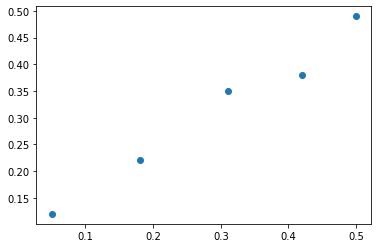

In [8]:
X = data[:,0]
y = data[:,1]
plt.scatter(X, y)

In [12]:
X = X.reshape((-1,1))
y = y.reshape((-1, 1))

## Solve via Inverse

In [14]:
from numpy import dot
from numpy.linalg import inv
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)

[[1.00233226]]


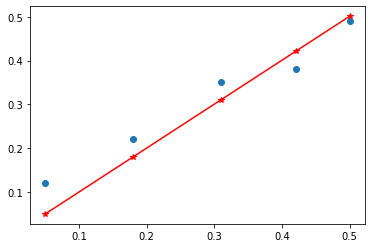

In [17]:
yhat = X.dot(b)
plt.scatter(X,y)
plt.plot(X, yhat, 'r*-')

## Solve via QR Decomposition
The QR decomposition is an approach of breaking a matrix down into its constituent elements.
### <center>$A = Q . R$</center>
Stepping over all of the derivation, the coefficients can be found using the Q and R elements as follows:
### <center>$b = R^{-1}.Q^T.y$</center>
Where A is the matrix of size m × n that we wish to decompose, Q a matrix with the size m × m, and R is an upper triangle matrix with the size m × n.
  
The QR decomposition approach is more computationally efficient and more numerically stable than calculating the normal equation directly, but does not work for all data matrices.

In [20]:
from numpy.linalg import qr
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
print(b)

[[1.00233226]]


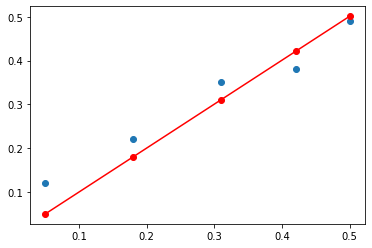

In [22]:
yhat = X.dot(b)
plt.scatter(X,y)
plt.plot(X, yhat, 'ro-')

## Solve via SVD and Pseudoinverse
### SVD
The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method like the QR decomposition.
### <center>$A = U \cdot \Sigma \cdot V^T$</center>
Where A is the real $n \times m$ matrix that we wish to decompose, U is an $m \times m$ matrix, $\Sigma$ is an $m \times n$ diagonal matrix, and $V^T$ is the V transpose of an $n \times n$ matrix.

* The diagonal values in the $\Sigma$ matrix are known as the singular values of the original matrix A
* The columns of the U matrix are called the left-singular vectors of A
* The columns of V are called the right-singular vectors of A

Every rectangular matrix has a singular value decomposition, although the resulting matrices may contain complex numbers and the limitations of floating point arithmetic may cause some matrices to fail to decompose neatly.
### Pseudoinverse
The pseudoinverse is the generalization of the matrix inverse for square matrices to rectangular matrices where the number of rows and columns are not equal. It is also called the **Moore-Penrose Inverse**.  
  
  
The pseudoinverse is denoted as $A^+$, where A is the matrix that is being inverted and is done as:
### <center>$A^+ = V \cdot D^+ \cdot U^T$</center>
where $D^+$ is the pseudoinverse of the diagonal matrix $\Sigma$

The $D^+$ can be calculated by creating a diagonal matrix from $\Sigma$, calculating the reciprocal of each non-zero element in $\Sigma$, and taking the transpose if the original matrix was rectangular.  
  
We can calculate <b>b</b> as:
### <center>$b = X^+ \cdot y$</center>

In [24]:
from numpy.linalg import pinv
b = pinv(X).dot(y)
print(b)

[[1.00233226]]


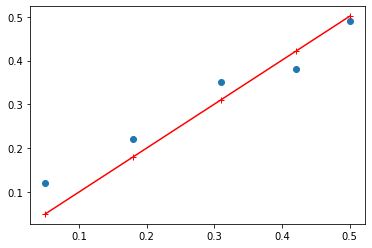

In [27]:
yhat = X.dot(b)
plt.scatter(X,y)
plt.plot(X, yhat, 'r+-')

## With a Bias term (intercept term)

In [33]:
# 1 is added to include the bias term
X = array([
    [0.05, 1],
    [0.18, 1],
    [0.31, 1],
    [0.42, 1],
    [0.5, 1]
])

In [41]:
b = pinv(X).dot(y)
print("Coefficient:", b[0])
print("Intercept:", b[1])

Coefficient: [0.78715288]
Intercept: [0.08215136]


In [35]:
yhat = X.dot(b)

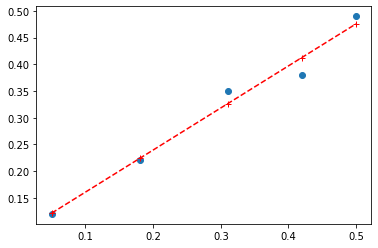

In [40]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0], yhat, 'r+--')